In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
for col in train.columns:
    print("column : ", col)
    print(train[col].head(),'\n')

column :  PassengerId
0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64 

column :  Survived
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64 

column :  Pclass
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64 

column :  Name
0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object 

column :  Sex
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object 

column :  Age
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64 

column :  SibSp
0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64 

column :  Parch
0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64 

column :  Ticket
0           A/5 21171
1            PC 17599
2    STON/O2.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

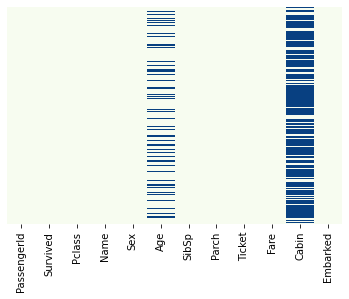

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,
           cmap="GnBu")

<AxesSubplot:>

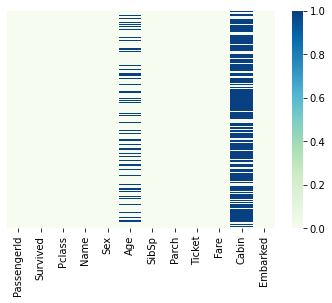

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=True,
           cmap="GnBu")

In [16]:
num_cols = [col for col in train.columns[:12] if train[col].dtype in ['int64', 'float64'] ]
print(num_cols)
train[num_cols].describe()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
cat_cols = [col for col in train.columns[:12] if train[col].dtype in ['O']]
print(cat_cols)
train[cat_cols].describe()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hassab, Mr. Hammad",male,347082,B96 B98,S
freq,1,577,7,4,644


## 생존자 몇명일까?

<AxesSubplot:xlabel='Survived', ylabel='count'>

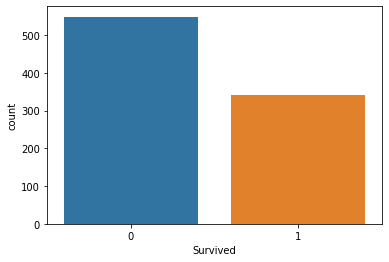

In [20]:
sns.countplot(x="Survived", data=train)

- 생존자가 약 330명, 사망자가 약 550명 정도 된다.
- 생존자가 35% 정도 된다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

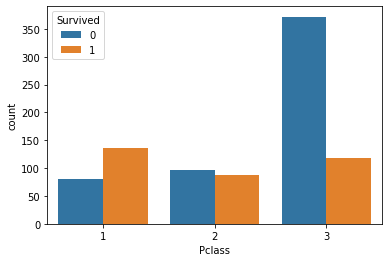

In [23]:
sns.countplot(x='Pclass', hue='Survived',data=train)

- 1등급은 생존자가 많다.
- 3등급에서의 사망자가 많다.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

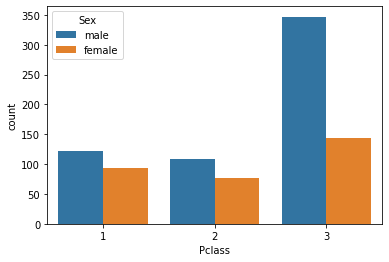

In [24]:
sns.countplot(x='Pclass', hue="Sex", data=train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

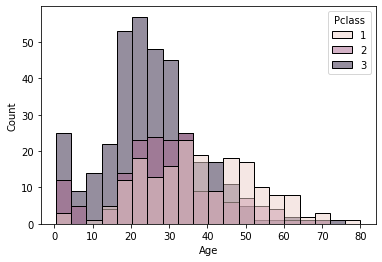

In [27]:
sns.histplot(x="Age", hue="Pclass", data=train)

## 구하는 순위 
- 좌석: 1등급 > 2등급 > 3등급
- 구분: 노인,어린이 > 여성 > 남성
- 성별: 여성 > 남성

<AxesSubplot:xlabel='Embarked', ylabel='count'>

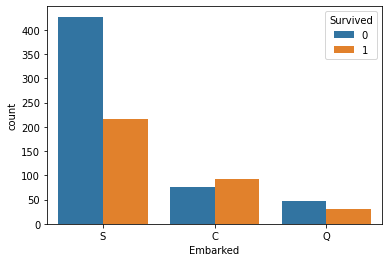

In [28]:
sns.countplot(x='Embarked', hue='Survived', data=train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

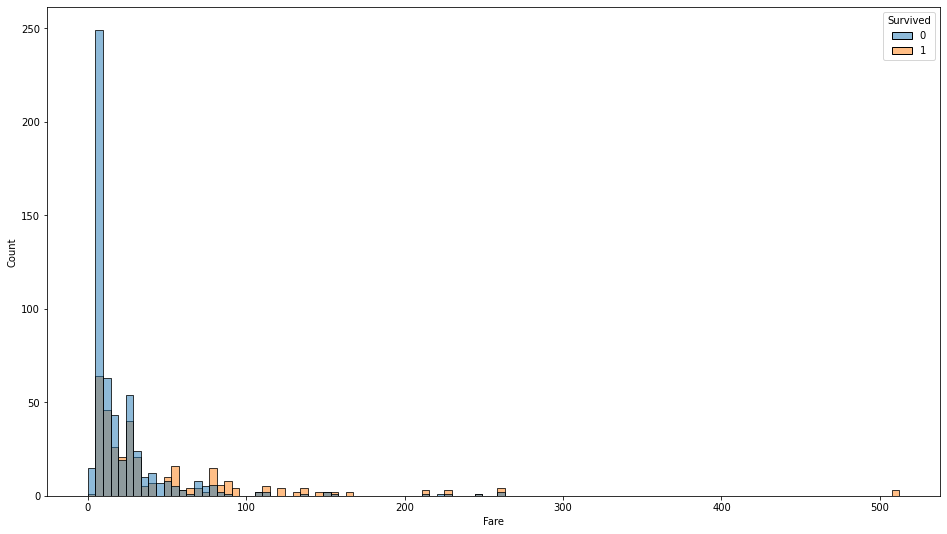

In [32]:
plt.figure(figsize=(16,9))
sns.histplot(x='Fare', hue='Survived', data=train)